In [51]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import ntpath
import random


In [52]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
df = pd.read_csv("driving_log.csv", names = columns)
#pd.set_option("display.max_colwidth", -1)
df.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\center_2023_10_20_21_43_17_157.jpg,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\left_2023_10_20_21_43_17_157.jpg,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\right_2023_10_20_21_43_17_157.jpg,0.0,0.000000,0,0.000048
1,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\center_2023_10_20_21_43_17_258.jpg,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\left_2023_10_20_21_43_17_258.jpg,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\right_2023_10_20_21_43_17_258.jpg,0.0,0.000000,0,0.000044
2,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\center_2023_10_20_21_43_17_358.jpg,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\left_2023_10_20_21_43_17_358.jpg,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\right_2023_10_20_21_43_17_358.jpg,0.0,0.000000,0,0.000042
3,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\center_2023_10_20_21_43_17_459.jpg,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\left_2023_10_20_21_43_17_459.jpg,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\right_2023_10_20_21_43_17_459.jpg,0.0,0.000000,0,0.000038
4,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\center_2023_10_20_21_43_17_560.jpg,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\left_2023_10_20_21_43_17_560.jpg,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\right_2023_10_20_21_43_17_560.jpg,0.0,0.199523,0,0.062761


In [53]:
def path_leaf(path):
    head, tail =ntpath.split(path)
    return tail

df['center']=df['center'].apply(path_leaf)
df['left']=df['left'].apply(path_leaf)
df['right']=df['right'].apply(path_leaf)
df.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2023_10_20_21_43_17_157.jpg,left_2023_10_20_21_43_17_157.jpg,right_2023_10_20_21_43_17_157.jpg,0.0,0.000000,0,0.000048
1,center_2023_10_20_21_43_17_258.jpg,left_2023_10_20_21_43_17_258.jpg,right_2023_10_20_21_43_17_258.jpg,0.0,0.000000,0,0.000044
2,center_2023_10_20_21_43_17_358.jpg,left_2023_10_20_21_43_17_358.jpg,right_2023_10_20_21_43_17_358.jpg,0.0,0.000000,0,0.000042
3,center_2023_10_20_21_43_17_459.jpg,left_2023_10_20_21_43_17_459.jpg,right_2023_10_20_21_43_17_459.jpg,0.0,0.000000,0,0.000038
4,center_2023_10_20_21_43_17_560.jpg,left_2023_10_20_21_43_17_560.jpg,right_2023_10_20_21_43_17_560.jpg,0.0,0.199523,0,0.062761


[-0.62072904 -0.56598593 -0.51124281 -0.45649969 -0.40175658 -0.34701346
 -0.29227035 -0.23752723 -0.18278411 -0.128041   -0.07329788 -0.01855477
  0.03618835  0.09093147  0.14567458  0.2004177   0.25516081  0.30990393
  0.36464705  0.41939016  0.47413328  0.52887639  0.58361951  0.63836263
  0.69310574]


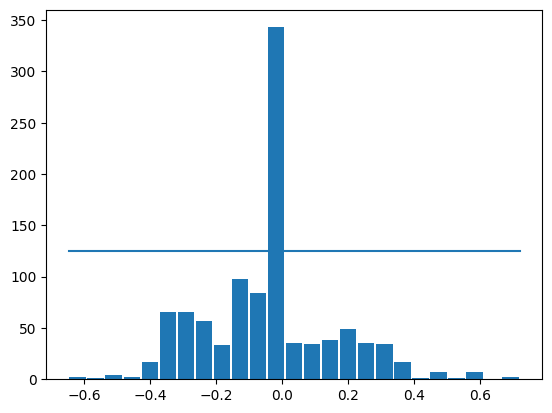

In [54]:
num_bins = 25
samples_per_bin = 125
hist, bins = np.histogram(df['steering'], num_bins)
center = (bins[:-1]+ bins[1:])*0.5
print(center)
plt.bar(center, hist, width= 0.05)
plt.plot((np.min(df['steering']), np.max(df['steering'])), (samples_per_bin, samples_per_bin))

total data: 1033
removed 218
remaining: 815


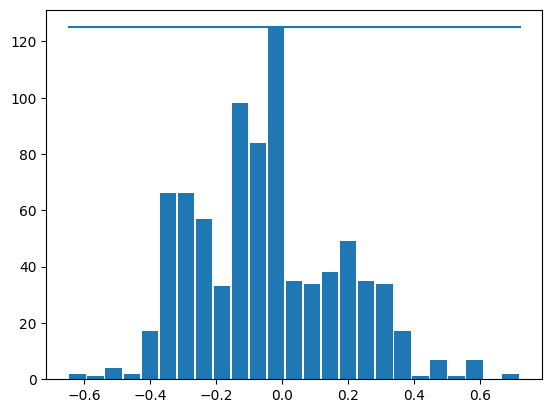

In [55]:
print("total data:", len(df))
remove_list = []
for j in range(num_bins):
    list_ =[]
    for i in range(len(df['steering'])):
        if df['steering'][i] >= bins[j] and df['steering'][i] <= bins[j+1]:
            list_.append(i)
    list_= shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('removed', len(remove_list))
df.drop(df.index[remove_list], inplace=True)
print('remaining:', len(df))

hist, bins = np.histogram(df['steering'], num_bins)

plt.bar(center, hist, width= 0.05)
plt.plot((np.min(df['steering']), np.max(df['steering'])), (samples_per_bin, samples_per_bin))


In [61]:
print(df.iloc[1])
def load_img_steering(df):
    image_path = []
    steering = []
    for i in range(len(df)):
        indexed_data = df.iloc[i]
        center, left,right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append( '/IMG'+center.strip())
        steering.append(float(indexed_data[3]))
        return image_path, steering
    
image_paths, steerings = load_img_steering(df)
print(image_paths)

center      center_2023_10_20_21_43_17_258.jpg
left        left_2023_10_20_21_43_17_258.jpg  
right       right_2023_10_20_21_43_17_258.jpg 
steering    0.0                               
throttle    0.0                               
reverse     0                                 
speed       0.000044                          
Name: 1, dtype: object
['/IMG\\center_2023_10_20_21_43_17_157.jpg']


In [59]:
X_train, X_test, y_train, y_test = train_test_split(image_paths, steerings, test_size=0.1, random_state=2)
print(len(X_train), len(X_test))

ValueError: With n_samples=1, test_size=0.1 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.